# **Multiclass Classification (MNIST) Demo**

In [1]:
# run this cell if you're using Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
  import sys
  import os
  !git clone https://github.com/satishchandrareddy/WhatisML.git
  code_location = "/content/WhatisML/Code/Supervised"
  sys.path.append(os.path.abspath(code_location)) 

Cloning into 'WhatisML'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 272 (delta 118), reused 240 (delta 86), pack-reused 0
Receiving objects: 100% (272/272), 21.34 MiB | 20.58 MiB/s, done.
Resolving deltas: 100% (118/118), done.


## **Import Libraries**

In [2]:
from IPython.display import HTML
import load_mnist
import NeuralNetwork
import matplotlib.pyplot as plt
import numpy as np
import Optimizer
import plot_results

## **1. Set up Data**

In [3]:
ntrain = 6000
nvalid = 1000
nclass = 10
Xtrain,Ytrain,Xvalid,Yvalid = load_mnist.load_mnist(ntrain,nvalid)

Xtrain.shape: (784, 6000) - Ytrain.shape: (1, 6000)
Xvalid.shape: (784, 1000) - Yvalid.shape: (1, 1000)


## **2. Define Model**

In [4]:
nfeature = Xtrain.shape[0]
np.random.seed(10)
model = NeuralNetwork.NeuralNetwork(nfeature)
model.add_layer(128,"relu")
model.add_layer(nclass,"softmax")

## **3. Compile model**

In [5]:
optimizer = Optimizer.Adam(0.02,0.9,0.999,1e-7)
model.compile("crossentropy",optimizer)
model.summary()

 
Layer	Units In	Units Out	Parameters
1	784		128		100480
2	128		10		1290
Total parameters: 101770
 


## **4. Train model**

In [6]:
epochs = 40
history = model.fit(Xtrain,Ytrain,epochs)

Epoch: 1 - Loss: 26.56415229521552 - Accuracy: 0.243
Epoch: 2 - Loss: 23.272277397106706 - Accuracy: 0.32216666666666666
Epoch: 3 - Loss: 18.680177642102475 - Accuracy: 0.4493333333333333
Epoch: 4 - Loss: 15.463986192473605 - Accuracy: 0.5433333333333333
Epoch: 5 - Loss: 13.40743676288595 - Accuracy: 0.6038333333333333
Epoch: 6 - Loss: 11.349592157712477 - Accuracy: 0.6586666666666666
Epoch: 7 - Loss: 9.931716778644473 - Accuracy: 0.6891666666666667
Epoch: 8 - Loss: 8.362730157181536 - Accuracy: 0.7298333333333333
Epoch: 9 - Loss: 7.161090938197846 - Accuracy: 0.7705
Epoch: 10 - Loss: 6.2611187035031595 - Accuracy: 0.796
Epoch: 11 - Loss: 5.296889474606107 - Accuracy: 0.833
Epoch: 12 - Loss: 5.04667886618872 - Accuracy: 0.8431666666666666
Epoch: 13 - Loss: 4.8573556559095765 - Accuracy: 0.8501666666666666
Epoch: 14 - Loss: 4.54751764487324 - Accuracy: 0.859
Epoch: 15 - Loss: 4.049499927995506 - Accuracy: 0.8698333333333333
Epoch: 16 - Loss: 3.906767932643901 - Accuracy: 0.876
Epoch: 17

## **5. Plot results**

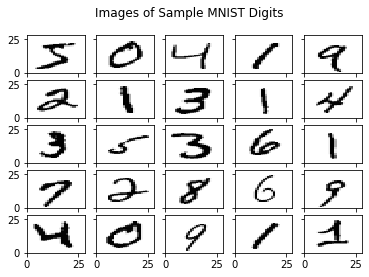

In [7]:
# plot data
Ytrain_pred = model.predict(Xtrain)
plot_results.plot_data_mnist(Xtrain,Ytrain)

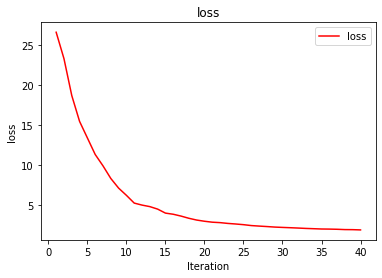

In [8]:
# plot loss
plot_results.plot_results_history(history,["loss"])

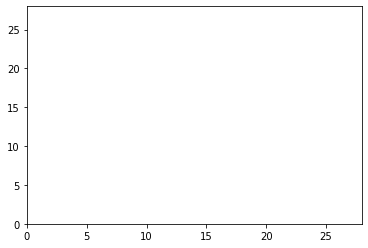

In [9]:
# prediction results animation
ani = plot_results.plot_results_mnist_animation(Xtrain,Ytrain,Ytrain_pred,50)
vid = HTML(ani.to_html5_video())
vid